Columns after fix: ['TV', 'Radio', 'Newspaper', 'Sales']
      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
6    8.7   48.9       75.0    7.2
7   57.5   32.8       23.5   11.8
8  120.2   19.6       11.6   13.2

Shape: (200, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None

Describe:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min     

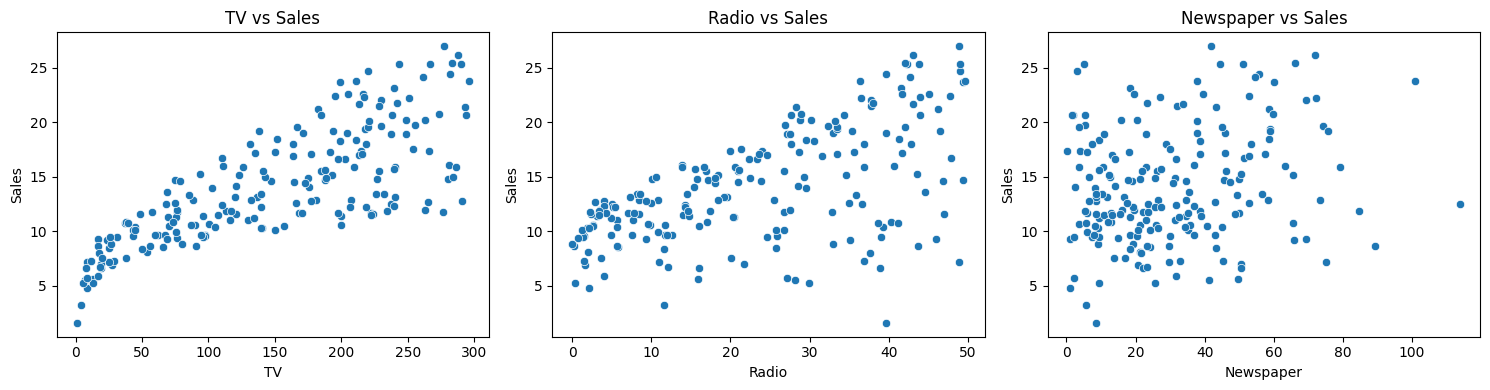


Correlation with Sales:
 Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

Train samples: 160, Test samples: 40

Model trained!
Intercept:      7.120
TV coefficient: 0.047

Test performance:
  MSE:  10.205
 RMSE: 3.194
   R²:  0.677


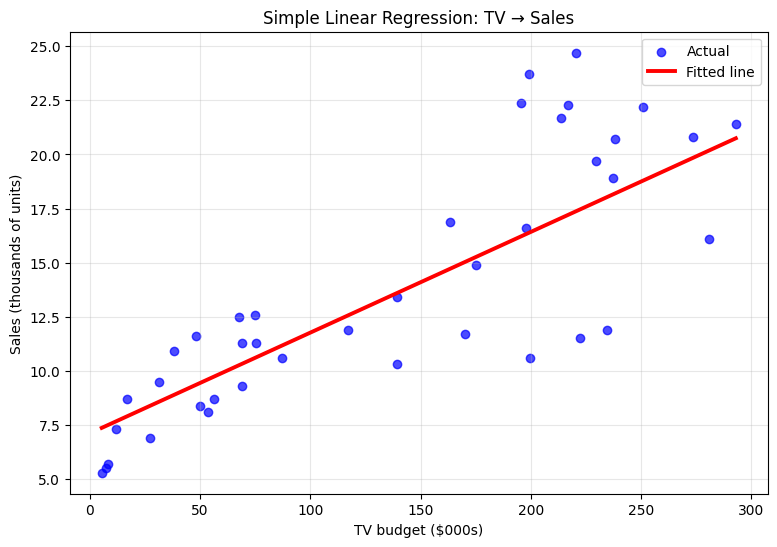


Done! Every extra $1,000 on TV advertising is associated with
≈ 0.05 thousand additional units sold (on average).


In [27]:
# ────────────── Step 1: Import libraries ──────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ────────────── Step 2: Load the data correctly ──────────────
url = "https://raw.githubusercontent.com/marcopeix/ISL-linear-regression/master/data/Advertising.csv"
df = pd.read_csv(url, index_col=0)   # first column = index

# Force-correct column names (this is the key fix)
df.columns = ['TV', 'Radio', 'Newspaper', 'Sales']   # ← direct assignment, no rename needed

print("Columns after fix:", df.columns.tolist())
print(df.head(8))

# ────────────── Step 3: Quick inspection ──────────────
print("\nShape:", df.shape)
print(df.info())
print("\nDescribe:\n", df.describe())

# ────────────── Step 4: Visualize ──────────────
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title("TV vs Sales")

plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title("Radio vs Sales")

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title("Newspaper vs Sales")

plt.tight_layout()
plt.show()

# Correlation
print("\nCorrelation with Sales:\n", df.corr(numeric_only=True)['Sales'].sort_values(ascending=False))

# ────────────── Step 5: Simple linear regression (TV only) ──────────────
X = df[['TV']]   # 2D DataFrame
y = df['Sales']

# ────────────── Step 6: Train-test split ──────────────
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"\nTrain samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

# ────────────── Step 7: Train model ──────────────
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel trained!")
print(f"Intercept:      {model.intercept_:.3f}")
print(f"TV coefficient: {model.coef_[0]:.3f}")

# ────────────── Step 8: Predict ──────────────
y_pred = model.predict(X_test)

# ────────────── Step 9: Evaluate ──────────────
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("\nTest performance:")
print(f"  MSE:  {mse:.3f}")
print(f" RMSE: {rmse:.3f}")
print(f"   R²:  {r2:.3f}")

# ────────────── Step 10: Plot regression fit ──────────────
plt.figure(figsize=(9, 6))
plt.scatter(X_test['TV'], y_test, color='blue', alpha=0.7, label='Actual')
sort_idx = np.argsort(X_test['TV'].values.flatten())
plt.plot(X_test['TV'].values[sort_idx], y_pred[sort_idx],
         color='red', linewidth=2.8, label='Fitted line')
plt.xlabel('TV budget ($000s)')
plt.ylabel('Sales (thousands of units)')
plt.title('Simple Linear Regression: TV → Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nDone! Every extra $1,000 on TV advertising is associated with")
print(f"≈ {model.coef_[0]:.2f} thousand additional units sold (on average).")

In [17]:
# ────────────── Step 3: Understand the data ──────────────
print("\nShape:", df.shape)          # (rows, columns)
print(df.info())                     # data types, missing values?
print(df.describe())                 # min, max, mean, etc.


Shape: (200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


ValueError: Could not interpret value `Sales` for `y`. An entry with this name does not appear in `data`.

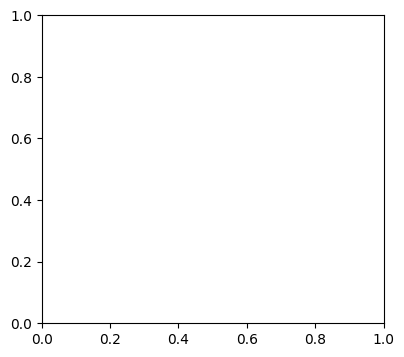